In [77]:
import tensorflow as tf
import pandas as pd

import numpy as np

print(tf.__version__)

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

2.16.1


In [78]:
dataset = pd.read_excel('../data/pisos_datos_numericos.xlsx', index_col='ID')

In [79]:
dataset.head(5)

,Planta,Metros cuadrados totales,Metros cuadrados habitables,Numero habitaciones,Numero baños,Estado piso,Amueblado,Terraza,Aire acondicionado,Urbanización,Piscina en la urbanización,Ascensor,Garaje,Años antigüedad piso,Accesibilidad,Años contrato alquiler,Casco viejo,Ensanche,Iturrama,Mendebaldea,Rochapea,Piso,N,S,E,W,Luz,Agua,Comunidad,Calefaccion,Precio alquiler al año,Gastos generales al año,Gastos iniciales,Beneficios totales,Beneficios al año,Precio alquiler aplicado al año
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,7,87.5,79.4,2,1.0,4,1,1,1,0,0,1,0,1,4,9,0,0,1,0,0,1,1,0,1,0,1,1,0,0,14060,1787,220,3196.814,355.201556,16226.646
2,3,71.2,64.3,2,1.5,3,1,0,1,1,0,1,1,7,5,5,0,1,0,0,0,1,0,1,1,0,0,1,1,0,10525,1124,572,6227.500,1245.500000,13008.900
3,5,104.6,90.3,3,2.0,2,1,1,0,0,0,1,1,15,3,4,0,0,0,1,0,1,0,0,0,1,1,1,1,0,18555,1512,2810,4160.112,1040.028000,21809.528
4,13,148.1,143.3,5,2.0,1,1,1,1,1,0,1,1,30,2,10,0,0,0,1,0,0,1,0,0,1,1,1,1,0,24430,2625,7630,20183.590,2018.359000,29836.359
5,5,80.8,69.0,2,1.0,2,0,0,0,0,0,0,1,10,4,10,0,0,0,0,1,1,0,0,1,0,1,0,1,0,10565,1134,16440,-8424.920,-842.492000,12500.508


In [80]:
dataset.shape

(180, 36)

In [81]:
dataset.columns

Index(['Planta', 'Metros cuadrados totales', 'Metros cuadrados habitables',
       'Numero habitaciones', 'Numero baños', 'Estado piso', 'Amueblado',
       'Terraza', 'Aire acondicionado', 'Urbanización',
       'Piscina en la urbanización', 'Ascensor', 'Garaje',
       'Años antigüedad piso', 'Accesibilidad', 'Años contrato alquiler',
       'Casco viejo', 'Ensanche', 'Iturrama', 'Mendebaldea', 'Rochapea',
       'Piso', 'N', 'S', 'E', 'W', 'Luz', 'Agua', 'Comunidad', 'Calefaccion',
       'Precio alquiler al año', 'Gastos generales al año', 'Gastos iniciales',
       'Beneficios totales', 'Beneficios al año',
       'Precio alquiler aplicado al año'],
      dtype='object')

---
---
# Visualizamos las distribuciones de las diferentes variables

In [82]:
no_booleans = dataset.select_dtypes(exclude='int64')
booleans = dataset.select_dtypes(include='int64')

df=dataset[['Planta', 'Años antigüedad piso', 'Años contrato alquiler', 'Precio alquiler al año', 'Gastos generales al año', 'Gastos iniciales']]

df1 = pd.merge(no_booleans, df, left_index=True, right_index=True, how='inner')
df2 = booleans.drop(columns=df)

c:\Users\Uned\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Uned\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Uned\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Uned\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option i

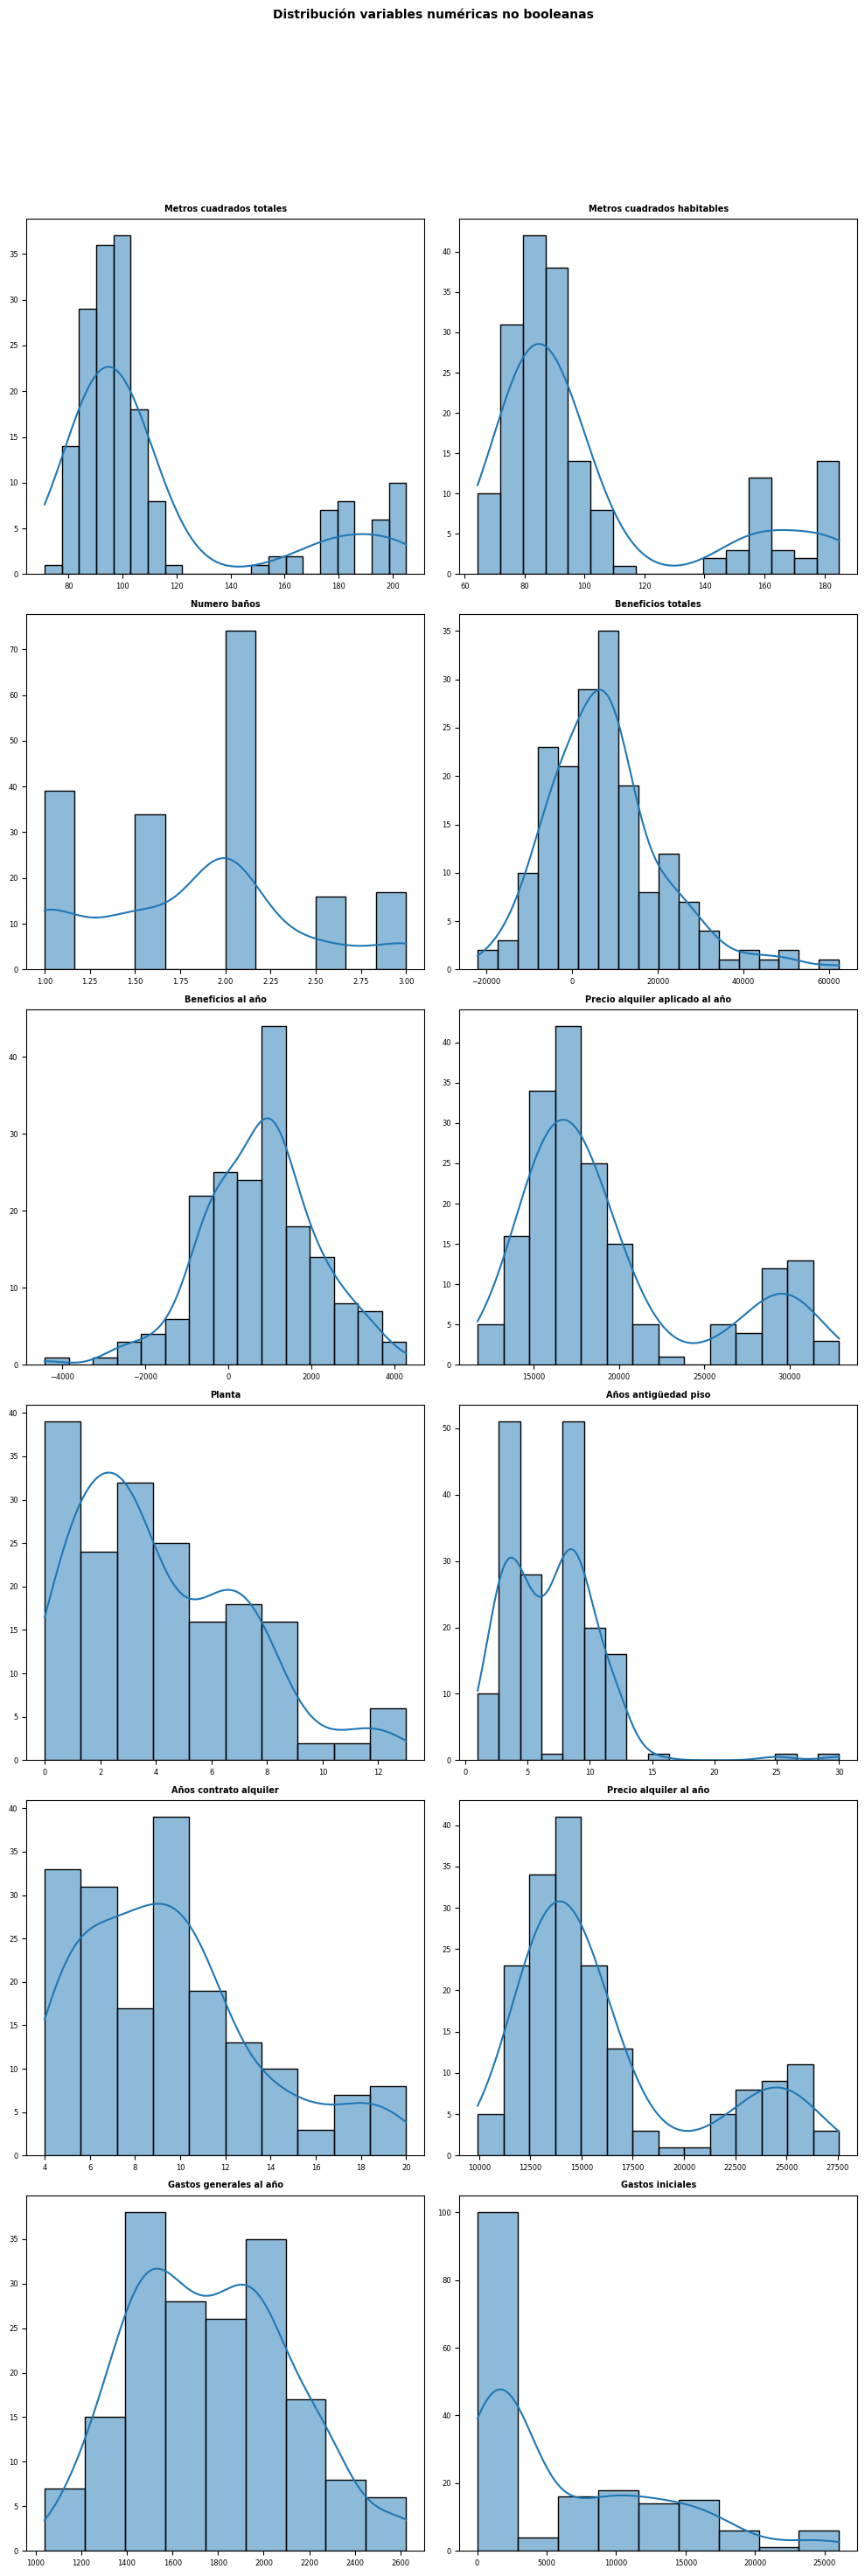

In [83]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filtrar columnas no booleanas
columnas_no_booleanas = df1.columns

# Calcular el número de filas y columnas
n_vars = len(columnas_no_booleanas)
n_cols = 2
n_rows = (n_vars - 1) // n_cols + 1  # Redondeo hacia arriba

# Calcular el tamaño de cada gráfico
fig_width = 10  # Ancho total de la figura
fig_height = 5 * n_rows  # Altura total de la figura

# Crear la matriz de subgráficos
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(fig_width, fig_height))
axes = axes.flat

# Iterar sobre las columnas no booleanas y los ejes
for col, ax in zip(columnas_no_booleanas, axes):
    sns.histplot(
        data=dataset,
        x=col,
        stat="count",
        kde=True,
        ax=ax
    )
    ax.set_title(col, fontsize=7, fontweight="bold")
    ax.tick_params(labelsize=6)
    ax.set_xlabel("")
    ax.set_ylabel("")

# Eliminar ejes no utilizados
for ax in axes[len(columnas_no_booleanas):]:
    fig.delaxes(ax)

# Ajustar el diseño de los subgráficos
fig.tight_layout()
plt.subplots_adjust(top=0.9)
fig.suptitle('Distribución variables numéricas no booleanas', fontsize=10, fontweight="bold")

plt.show()

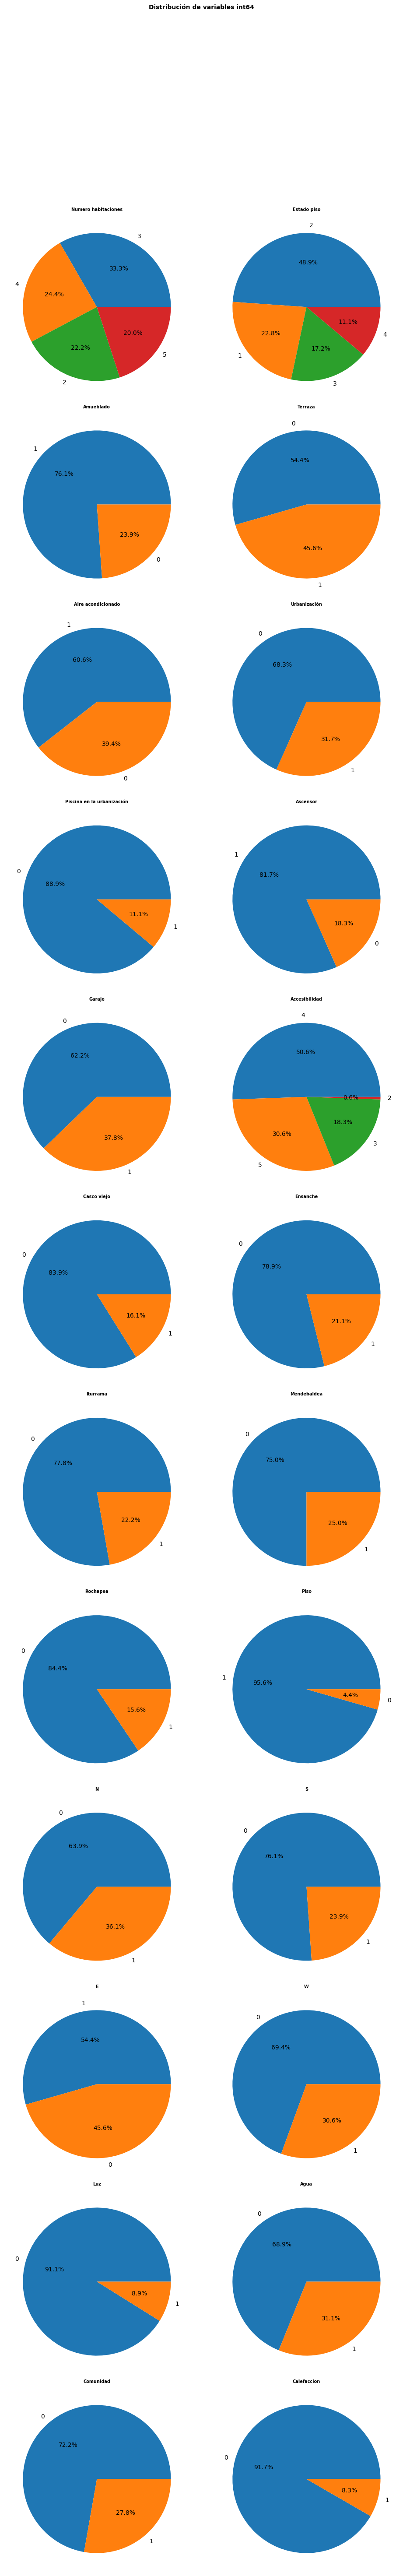

In [84]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filtrar columnas de tipo int64
columnas_int64 = df2.columns

# Calcular el número de filas y columnas
n_vars = len(columnas_int64)
n_cols = 2
n_rows = (n_vars - 1) // n_cols + 1  # Redondeo hacia arriba

# Calcular el tamaño de cada gráfico
fig_width = 10  # Ancho total de la figura
fig_height = 5 * n_rows  # Altura total de la figura

# Crear la matriz de subgráficos
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(fig_width, fig_height))
axes = axes.flat

# Iterar sobre las columnas int64 y los ejes
for col, ax in zip(columnas_int64, axes):
    # Calcular los valores de cada categoría
    counts = dataset[col].value_counts()
    
    # Crear el gráfico de pie
    ax.pie(counts, labels=counts.index, autopct='%1.1f%%')
    ax.set_title(col, fontsize=7, fontweight="bold")

# Eliminar ejes no utilizados
for ax in axes[len(columnas_int64):]:
    fig.delaxes(ax)

# Ajustar el diseño de los subgráficos
fig.tight_layout()
plt.subplots_adjust(top=0.9)
fig.suptitle('Distribución de variables int64', fontsize=10, fontweight="bold")

plt.show()


---
---
# Realizamos la estandarización de los datos con StandardScaler

In [85]:
dataset.describe()

,Planta,Metros cuadrados totales,Metros cuadrados habitables,Numero habitaciones,Numero baños,Estado piso,Amueblado,Terraza,Aire acondicionado,Urbanización,Piscina en la urbanización,Ascensor,Garaje,Años antigüedad piso,Accesibilidad,Años contrato alquiler,Casco viejo,Ensanche,Iturrama,Mendebaldea,Rochapea,Piso,N,S,E,W,Luz,Agua,Comunidad,Calefaccion,Precio alquiler al año,Gastos generales al año,Gastos iniciales,Beneficios totales,Beneficios al año,Precio alquiler aplicado al año
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,4.155556,113.226667,101.847222,3.422222,1.827778,2.166667,0.761111,0.455556,0.605556,0.316667,0.111111,0.816667,0.377778,6.894444,4.111111,9.477778,0.161111,0.211111,0.222222,0.250000,0.155556,0.955556,0.361111,0.238889,0.544444,0.305556,0.088889,0.311111,0.277778,0.083333,16199.355556,1770.438889,6504.272222,7687.558863,754.310238,19481.445794
std,3.019161,37.791997,34.432910,1.046172,0.594016,0.906217,0.427594,0.499410,0.490094,0.466474,0.315146,0.388019,0.486184,3.829461,0.708203,3.969796,0.368659,0.409235,0.416899,0.434221,0.363444,0.206655,0.481662,0.427594,0.499410,0.461927,0.285377,0.464239,0.449153,0.277156,4457.496551,345.896231,6667.045217,13437.381855,1368.891493,5422.312579
min,0.000000,71.200000,64.300000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9925.000000,1039.000000,30.000000,-22074.412500,-4414.882500,11692.642500
25%,2.000000,90.650000,80.325000,3.000000,1.500000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,4.000000,4.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,13160.000000,1485.000000,1460.000000,-913.507750,-79.439222,15822.657375
50%,3.000000,98.000000,87.900000,3.000000,2.000000,2.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,7.500000,4.000000,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14580.000000,1758.000000,2705.000000,6620.628000,859.562750,17505.720000
75%,6.000000,109.475000,101.875000,4.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,9.000000,5.000000,11.000000,0.000000,0.000000,0.000000,0.250000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,16885.000000,2005.750000,11283.000000,12707.571125,1584.517663,20323.145375
max,13.000000,205.000000,184.900000,5.000000,3.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,30.000000,5.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,27570.000000,2625.000000,26050.000000,62355.592000,4277.210000,32910.400000


In [86]:
#Separamos del dataset las etiquetas (los datos a predecir) (las ultimas 6 columnas):
x_dataset = dataset.iloc[:, :-6]
y_dataset = dataset.iloc[:,-6:]

In [87]:
x_dataset.head(4)

,Planta,Metros cuadrados totales,Metros cuadrados habitables,Numero habitaciones,Numero baños,Estado piso,Amueblado,Terraza,Aire acondicionado,Urbanización,Piscina en la urbanización,Ascensor,Garaje,Años antigüedad piso,Accesibilidad,Años contrato alquiler,Casco viejo,Ensanche,Iturrama,Mendebaldea,Rochapea,Piso,N,S,E,W,Luz,Agua,Comunidad,Calefaccion
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,7,87.5,79.4,2,1.0,4,1,1,1,0,0,1,0,1,4,9,0,0,1,0,0,1,1,0,1,0,1,1,0,0
2,3,71.2,64.3,2,1.5,3,1,0,1,1,0,1,1,7,5,5,0,1,0,0,0,1,0,1,1,0,0,1,1,0
3,5,104.6,90.3,3,2.0,2,1,1,0,0,0,1,1,15,3,4,0,0,0,1,0,1,0,0,0,1,1,1,1,0
4,13,148.1,143.3,5,2.0,1,1,1,1,1,0,1,1,30,2,10,0,0,0,1,0,0,1,0,0,1,1,1,1,0


In [88]:
y_dataset.head(4)

,Precio alquiler al año,Gastos generales al año,Gastos iniciales,Beneficios totales,Beneficios al año,Precio alquiler aplicado al año
ID,,,,,,
1,14060,1787,220,3196.814,355.201556,16226.646
2,10525,1124,572,6227.500,1245.500000,13008.900
3,18555,1512,2810,4160.112,1040.028000,21809.528
4,24430,2625,7630,20183.590,2018.359000,29836.359


In [89]:
from sklearn.preprocessing import MinMaxScaler

#Comentar la opcion que no nos interese

#scaler = StandardScaler()
scaler = MinMaxScaler()

x_scaled_data = scaler.fit_transform(x_dataset)

x_scaled_data = pd.DataFrame(x_scaled_data, columns=x_dataset.columns)

In [90]:
x_scaled_data['Terraza'].describe()

count    180.000000
mean       0.455556
std        0.499410
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: Terraza, dtype: float64

In [91]:
x_scaled_data['Metros cuadrados totales'].describe()

count    180.000000
mean       0.314101
std        0.282451
min        0.000000
25%        0.145366
50%        0.200299
75%        0.286061
max        1.000000
Name: Metros cuadrados totales, dtype: float64

In [92]:
x_scaled_data['ID'] = np.arange(1, len(x_scaled_data) + 1)

# Establecer la columna 'id' como el índice del DataFrame
x_scaled_data.set_index('ID', inplace=True)

In [93]:
x_scaled_data.describe()

,Planta,Metros cuadrados totales,Metros cuadrados habitables,Numero habitaciones,Numero baños,Estado piso,Amueblado,Terraza,Aire acondicionado,Urbanización,Piscina en la urbanización,Ascensor,Garaje,Años antigüedad piso,Accesibilidad,Años contrato alquiler,Casco viejo,Ensanche,Iturrama,Mendebaldea,Rochapea,Piso,N,S,E,W,Luz,Agua,Comunidad,Calefaccion
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,0.319658,0.314101,0.311337,0.474074,0.413889,0.388889,0.761111,0.455556,0.605556,0.316667,0.111111,0.816667,0.377778,0.203257,0.703704,0.342361,0.161111,0.211111,0.222222,0.250000,0.155556,0.955556,0.361111,0.238889,0.544444,0.305556,0.088889,0.311111,0.277778,0.083333
std,0.232243,0.282451,0.285513,0.348724,0.297008,0.302072,0.427594,0.499410,0.490094,0.466474,0.315146,0.388019,0.486184,0.132050,0.236068,0.248112,0.368659,0.409235,0.416899,0.434221,0.363444,0.206655,0.481662,0.427594,0.499410,0.461927,0.285377,0.464239,0.449153,0.277156
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.153846,0.145366,0.132877,0.333333,0.250000,0.333333,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.103448,0.666667,0.125000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.230769,0.200299,0.195688,0.333333,0.500000,0.333333,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.224138,0.666667,0.312500,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.461538,0.286061,0.311567,0.666667,0.500000,0.666667,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.275862,1.000000,0.437500,0.000000,0.000000,0.000000,0.250000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [94]:
#Creamos el dataset conjunto y lo guardamos
dataset = pd.concat([x_scaled_data, y_dataset], axis=1)

In [95]:
dataset.head()

,Planta,Metros cuadrados totales,Metros cuadrados habitables,Numero habitaciones,Numero baños,Estado piso,Amueblado,Terraza,Aire acondicionado,Urbanización,Piscina en la urbanización,Ascensor,Garaje,Años antigüedad piso,Accesibilidad,Años contrato alquiler,Casco viejo,Ensanche,Iturrama,Mendebaldea,Rochapea,Piso,N,S,E,W,Luz,Agua,Comunidad,Calefaccion,Precio alquiler al año,Gastos generales al año,Gastos iniciales,Beneficios totales,Beneficios al año,Precio alquiler aplicado al año
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0.538462,0.121824,0.125207,0.000000,0.00,1.000000,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.000000,0.666667,0.3125,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,14060,1787,220,3196.814,355.201556,16226.646
2,0.230769,0.000000,0.000000,0.000000,0.25,0.666667,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.206897,1.000000,0.0625,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,10525,1124,572,6227.500,1245.500000,13008.900
3,0.384615,0.249626,0.215589,0.333333,0.50,0.333333,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.482759,0.333333,0.0000,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,18555,1512,2810,4160.112,1040.028000,21809.528
4,1.000000,0.574738,0.655058,1.000000,0.50,0.000000,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.000000,0.000000,0.3750,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,24430,2625,7630,20183.590,2018.359000,29836.359
5,0.384615,0.071749,0.038972,0.000000,0.00,0.333333,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.310345,0.666667,0.3750,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,10565,1134,16440,-8424.920,-842.492000,12500.508


In [96]:
dataset['Metros cuadrados totales'].describe()

count    180.000000
mean       0.314101
std        0.282451
min        0.000000
25%        0.145366
50%        0.200299
75%        0.286061
max        1.000000
Name: Metros cuadrados totales, dtype: float64

In [97]:
dataset['Terraza'].describe()

count    180.000000
mean       0.455556
std        0.499410
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: Terraza, dtype: float64

In [98]:
dataset.loc[[3,25,101]]

,Planta,Metros cuadrados totales,Metros cuadrados habitables,Numero habitaciones,Numero baños,Estado piso,Amueblado,Terraza,Aire acondicionado,Urbanización,Piscina en la urbanización,Ascensor,Garaje,Años antigüedad piso,Accesibilidad,Años contrato alquiler,Casco viejo,Ensanche,Iturrama,Mendebaldea,Rochapea,Piso,N,S,E,W,Luz,Agua,Comunidad,Calefaccion,Precio alquiler al año,Gastos generales al año,Gastos iniciales,Beneficios totales,Beneficios al año,Precio alquiler aplicado al año
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
3,0.384615,0.249626,0.215589,0.333333,0.5,0.333333,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.482759,0.333333,0.0000,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,18555,1512,2810,4160.1120,1040.0280,21809.5280
25,0.692308,0.661435,0.678275,1.000000,0.5,0.333333,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.310345,0.666667,0.0625,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,26022,1812,2230,8009.2820,1601.8564,29881.8564
101,0.076923,0.165919,0.145108,0.000000,0.0,1.000000,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.034483,1.000000,0.0625,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,15789,1776,86,4570.7075,914.1415,18496.3415


In [99]:
dir_exc = '../data/pisos_scaled_data_min_max.xlsx'
dir_csv = '../data/pisos_scaled_data_min_max.csv'

dataset.to_csv(dir_csv, index=True)
dataset.to_excel(dir_exc, index=True)